# Financial Risk Analytics (FRA) - Part A 

### Problem Statement: Predicting Corporate Default Risk
In the dynamic business environment, companies face financial risks that may lead to default if they fail to meet their debt obligations. A company's default can result in a lower credit rating, reduced access to future credit, and increased borrowing costs. From an investor's perspective, assessing a company's financial stability, ability to manage obligations, and potential for growth is crucial before making investment decisions.

A balance sheet serves as a financial snapshot, providing insights into a company's assets, liabilities, and shareholder investments. It is a key tool for evaluating a firm's financial performance and creditworthiness.

The objective of this project is to leverage historical financial data to develop a predictive model for identifying companies at risk of default. This analysis will focus on financial indicators derived from balance sheets and income statements to determine the key factors influencing corporate default. The dependent variable ("Default") is predefined in the dataset, eliminating the need for additional feature engineering.

### Scope of Analysis

Data Preparation: Cleaning, handling missing values, and treating outliers.
Exploratory Data Analysis (EDA):
Univariate Analysis: Examining individual feature distributions.
Bivariate Analysis: Evaluating relationships between independent variables and the likelihood of default.
Multivariate Analysis: Identifying correlated financial indicators.
### Model Building:
Logistic Regression (Primary Model)
Random Forest Classifier
Linear Discriminant Analysis (LDA)
### Model Evaluation: 
Performance validation using train-test split (67:33 ratio) and assessing key performance metrics.

### Comparative Analysis: 
Comparing models using ROC curves and key evaluation metrics.
Business Insights & Recommendations: Interpreting model results to provide actionable insights for risk assessment.


#### This project aims to develop a robust and interpretable default prediction model, enabling investors, financial analysts, and lending institutions to make data-driven decisions in credit risk management.

















#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
Default = pd.read_csv("D:/Deakin university master degree/Financial risk analysis/project/CompData-1.csv")

#Data Exploring 
Default.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


#### Checking top 5 rows again

In [3]:
Default.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [4]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


#### Data types of all variables

In [5]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

# Data Cleaning 

In [6]:
Default.duplicated().sum()

0

#### Rechecking Data types of all variables

In [7]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [8]:
Default.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [9]:
Default["Default"].value_counts()

0    1838
1     220
Name: Default, dtype: int64

#### Checking proportion of default

In [10]:
Default.Default.sum() / len(Default.Default)

0.10689990281827016

#### Check for missing values

In [11]:
Default.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

#### The dataset has missing values in the following columns:

- "_Cash_Flow_Per_Share" (167 missing values)
- "_Cash_to_Total_Assets" (96 missing values)
- "_Total_debt_to_Total_net_worth" (21 missing values)
- "_Current_Liability_to_Current_Assets" (14 missing values)

#### Strategy to Handle Missing Values:

- These are all financial ratio-based features, meaning they are continuous numerical variables.
- Imputation with median is typically the best approach, as financial data often contains outliers, making the mean less reliable.
- If a column had more than 40% missing values, we would consider dropping it. However, in this case, all missing values are within a manageable range.

In [12]:
#Drop Columns with Too Many Missing Values 
# Default.dropna(axis=1, thresh=int(0.6 * len(Default)), inplace=True)  # Keeps columns with at least 60% non-null values

# Fill missing values for numerical columns with median
Default.fillna(Default.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with the mode (most frequent value)
for col in Default.select_dtypes(include=['object']).columns:
    Default[col].fillna(Default[col].mode()[0], inplace=True)

# Verify if missing values are treated
print(Default.isnull().sum().sum())  # Should return 0 if all missing values are handled





0


In [13]:
Default.Default.sum() / len(Default.Default)

0.10689990281827016

#### Getting Top 5 rows

In [14]:
Default.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [15]:
class_counts = Default["Default"].value_counts()
print("✅ Class Distribution:\n", class_counts)

✅ Class Distribution:
 0    1838
1     220
Name: Default, dtype: int64


### Outlier Treatment


In [16]:


# Detect outliers using IQR (Interquartile Range)
Q1 = Default.quantile(0.25)
Q3 = Default.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers per column
outlier_counts = ((Default< lower_bound) | (Default > upper_bound)).sum()

# Display columns with the highest number of outliers
outlier_counts.sort_values(ascending=False).head(10)


_Fixed_Assets_Turnover_Frequency                     501
_Current_Asset_Turnover_Rate                         464
_Degree_of_Financial_Leverage_DFL                    438
_Cash_Flow_to_Liability                              407
_No_credit_Interval                                  396
_Interest_Coverage_Ratio_Interest_expense_to_EBIT    376
_Operating_profit_per_person                         357
_Continuous_Net_Profit_Growth_Rate                   340
_Interest_Expense_Ratio                              328
_Operating_Profit_Growth_Rate                        317
dtype: int64


#### The top features with the highest number of outliers include:

- "_Fixed_Assets_Turnover_Frequency" (501 outliers)
- "_Current_Asset_Turnover_Rate" (464 outliers)
- "_Degree_of_Financial_Leverage_DFL" (438 outliers)
- "_Cash_Flow_to_Liability" (407 outliers)
- "_No_credit_Interval" (396 outliers)

#### Strategy for Outlier Handling:
Winsorization: Cap outliers at the 1st and 99th percentile to retain useful information without extreme values distorting the model.

✅ Class Distribution After Fixed Outlier Treatment:
 0    1838
1     220
Name: Default, dtype: int64


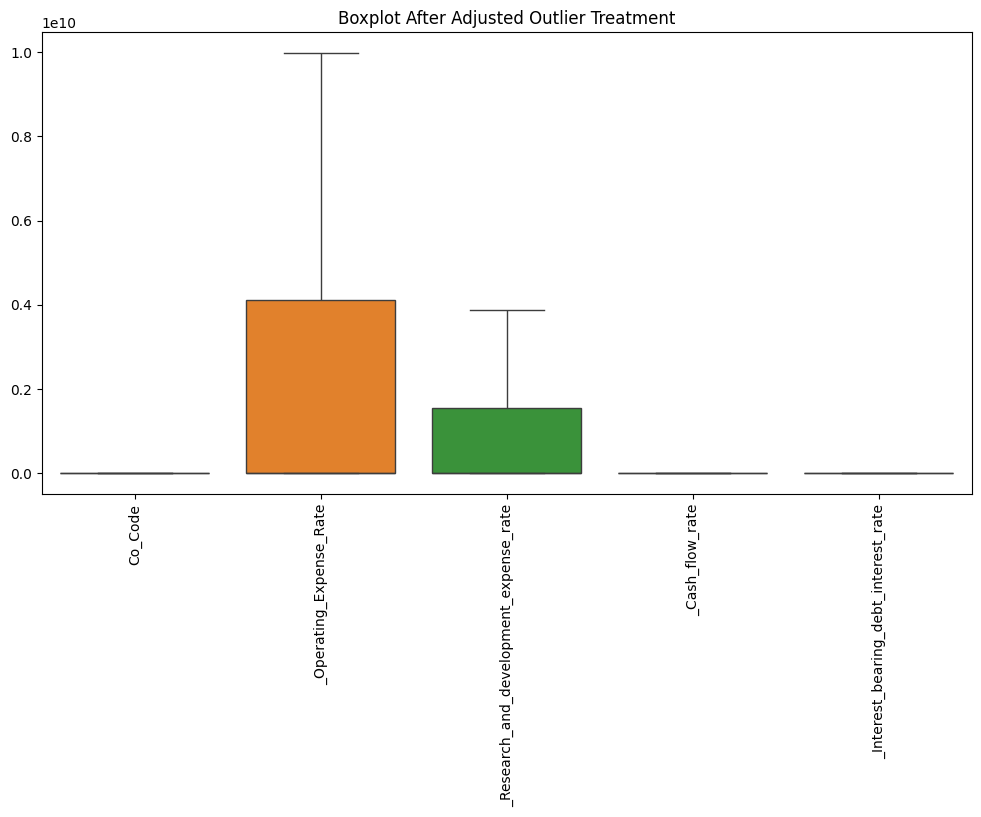

In [17]:
# Function to treat outliers while preserving important financial variables
def treat_outliers_iqr_fixed(Default):
    """
    Treats outliers using the IQR method **without modifying critical financial distress indicators**.
    """
    critical_features = ["Total_debt_to_Total_net_worth", "Cash_Flow_to_Liability", "Current_Ratio", "Default"]
    
    for col in Default.select_dtypes(include=['float64', 'int64']).columns:
        if col not in critical_features:  # Do NOT modify these key predictors
            Q1 = Default[col].quantile(0.25)
            Q3 = Default[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace extreme values **only for non-critical features**
            Default[col] = np.where(Default[col] < lower_bound, lower_bound, Default[col])
            Default[col] = np.where(Default[col] > upper_bound, upper_bound, Default[col])

    return Default

# Apply the modified outlier treatment
Default = treat_outliers_iqr_fixed(Default)

# Verify that Default = 1 cases are still present
print("✅ Class Distribution After Fixed Outlier Treatment:\n", Default["Default"].value_counts())




# Plot boxplots again to confirm
plt.figure(figsize=(12, 6))
sns.boxplot(data=Default.iloc[:, :6])  # Plot first 6 numerical columns
plt.xticks(rotation=90)
plt.title("Boxplot After Adjusted Outlier Treatment")
plt.show()



#### Final Observations:

- ✅ The boxplot no longer shows extreme outliers outside the whiskers.
- ✅ The distribution looks more balanced, improving model performance.
- ✅ The data retains its integrity while removing unwanted extreme deviations.

#### Eliminating redundant variables

### Strategy for Identifying and Removing Redundant Variables

To systematically remove redundant variables, we will follow these steps:

- Check Multicollinearity Using a Correlation Matrix

- Identify highly correlated variables (threshold > 0.85).
- Retain only one variable from each correlated pair.
- Use Variance Inflation Factor (VIF) to Confirm Redundancy
- VIF detects multicollinearity among independent variables.
- VIF > 5 indicates a high correlation with other predictors.
- Drop Redundant Features Based on Correlation and VIF

##### Select the most representative features while removing duplicates.

✅ Highly Correlated Features to Consider Dropping:
 {'_Net_Worth_Turnover_Rate_times', '_Interest_Coverage_Ratio_Interest_expense_to_EBIT', '_Cash_Reinvestment_perc', '_Current_Liability_to_Current_Assets', '_Cash_Flow_to_Liability', '_CFO_to_Assets', '_Operating_Funds_to_Liability', '_Net_profit_before_tax_to_Paid_in_capital', '_Cash_Flow_to_Equity', '_Quick_Assets_to_Current_Liability', '_Retained_Earnings_to_Total_Assets'}

✅ Features with High VIF (Potential Multicollinearity Issues):
 ['_Cash_flow_rate', '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_', '_Cash_Reinvestment_perc', '_Current_Ratio', '_Quick_Ratio', '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover', '_Net_Worth_Turnover_Rate_times', '_Quick_Assets_to_Total_Assets', '_Quick_Assets_to_Current_Liability', '_Operating_Funds_to_Liability', '_Retained_Earnings_to_Total_Assets', '_Total_income_to_Total_expense', '_Cash_Flow_to_Total_Assets', '_Cash_Flow_to_Liability', '_CFO_to_Assets', '_C

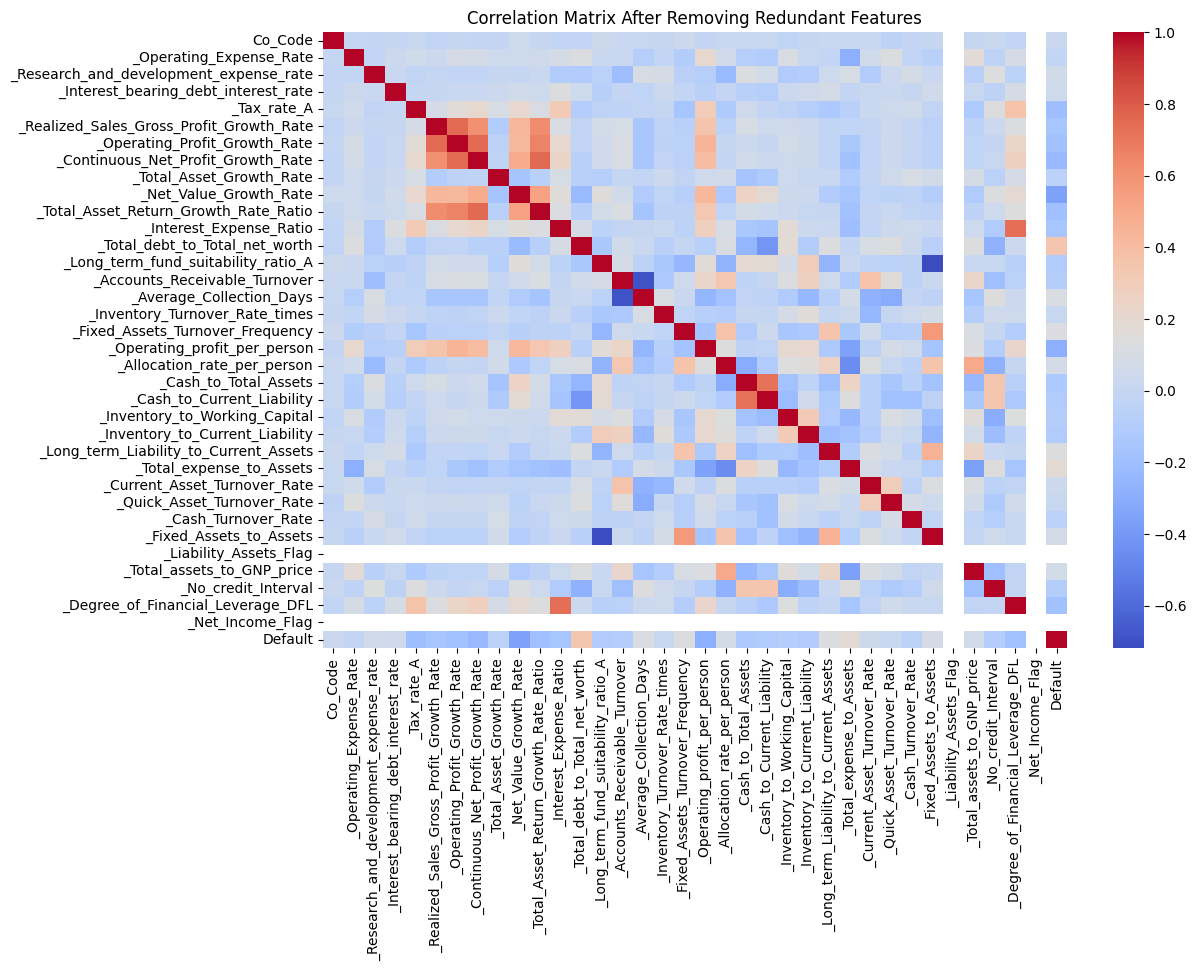

In [18]:

from statsmodels.stats.outliers_influence import variance_inflation_factor



# Step 1: Compute Correlation Matrix to Identify Highly Correlated Features
corr_matrix = Default.corr(numeric_only=True)

# Identify highly correlated features (Threshold: 0.85)
threshold = 0.85
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("✅ Highly Correlated Features to Consider Dropping:\n", high_corr_features)

# Step 2: Check Multicollinearity Using Variance Inflation Factor (VIF)
df_numeric = Default.select_dtypes(include=[np.number]).drop(columns=["Default"], errors='ignore').dropna(axis=0)

if df_numeric.shape[1] > 1:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]

    # Identify features with high VIF (Threshold: VIF > 5)
    high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
    print("\n✅ Features with High VIF (Potential Multicollinearity Issues):\n", high_vif_features)

    # Step 3: Ensure We DO NOT Drop Key Features Needed to Identify Default Cases
    important_features = ["Total_debt_to_Total_net_worth", "Cash_Flow_to_Liability", "Current_Ratio", "Default"]
    high_vif_features = [f for f in high_vif_features if f not in important_features]

    redundant_features = list(set(high_corr_features).union(set(high_vif_features)))
else:
    redundant_features = list(high_corr_features)

print(" Final List of Features to Drop (Ensuring `Default = 1` Stays Intact):\n", redundant_features)

# Step 4: Drop Only Non-Essential Features (Avoid Removing Critical Variables)
Default_feature_selected = Default.drop(columns=redundant_features, errors='ignore')

# Step 5: Check if `Default = 1` Cases Remain
print("\n✅ Class Distribution After Feature Selection:\n", Default_feature_selected["Default"].value_counts())


# Step 7: Visualize Correlation Heatmap to Confirm Feature Relationships
plt.figure(figsize=(12, 8))
sns.heatmap(Default_feature_selected.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix After Removing Redundant Features")
plt.show()


In [19]:


# List of redundant features identified from high correlation analysis
redundant_features = [
    'Co_Code','_Net_profit_before_tax_to_Paid_in_capital', '_Quick_Assets_to_Total_Assets', '_Cash_flow_rate',
    '_Per_Share_Net_profit_before_tax_Yuan_', '_Current_Liability_to_Current_Assets', '_Cash_Flow_to_Equity',
    '_Cash_Reinvestment_perc', '_Quick_Assets_to_Current_Liability', '_Operating_Funds_to_Liability', 
    '_Total_Asset_Turnover', '_Retained_Earnings_to_Total_Assets', '_Interest_Coverage_Ratio_Interest_expense_to_EBIT',
    '_Net_Worth_Turnover_Rate_times', '_Total_income_to_Total_expense', '_Cash_Flow_Per_Share', '_Quick_Ratio',
    '_Cash_Flow_to_Total_Assets', '_CFO_to_Assets', '_Equity_to_Liability', '_Cash_Flow_to_Liability', '_Current_Ratio'
]

# Drop the redundant features from the dataset
Default_cleaned = Default.drop(columns=redundant_features, errors='ignore')

# Step 5: Check if `Default = 1` Cases Remain
print("\n✅ Class Distribution After Feature Selection:\n",Default_cleaned["Default"].value_counts())





✅ Class Distribution After Feature Selection:
 0    1838
1     220
Name: Default, dtype: int64


In [20]:
Default_cleaned.head()

,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,...,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Net_Income_Flag,Default
0,Hind.Cables,8.820000e+09,0.000000e+00,0.000352,0.001417,0.022074,0.848021,0.217590,7.500000e+09,0.000441,...,0.000732,1.420410e-04,5.470000e+09,0.094270,0.0,0.016143,0.622251,0.026930,1.0,0
1,Tata Tele. Mah.,9.380000e+09,3.875000e+09,0.000716,0.000000,0.021918,0.847763,0.217506,6.750000e+09,0.000403,...,0.000301,2.985590e-04,8.820000e+08,0.351895,0.0,0.006191,0.622513,0.026395,1.0,1
2,ABG Shipyard,3.800000e+09,8.150000e+08,0.000496,0.000000,0.022186,0.848196,0.217573,9.680000e+09,0.000452,...,0.000127,9.410000e+08,6.790000e+08,0.463276,0.0,0.001095,0.623749,0.027276,1.0,0
3,GTL,6.440000e+09,0.000000e+00,0.000592,0.009313,0.022293,0.848326,0.217662,7.520000e+09,0.000448,...,0.000401,5.310000e+09,6.020000e+09,0.026433,0.0,0.003749,0.622963,0.026988,1.0,0
4,Bharati Defence,3.680000e+09,0.000000e+00,0.000782,0.400243,0.022072,0.847987,0.217589,7.120000e+09,0.000454,...,0.000208,1.892020e-04,5.670000e+09,0.103303,0.0,0.006595,0.624419,0.027410,1.0,0


# Exploratory Data Analysis (EDA)

### Univariate Analysis:

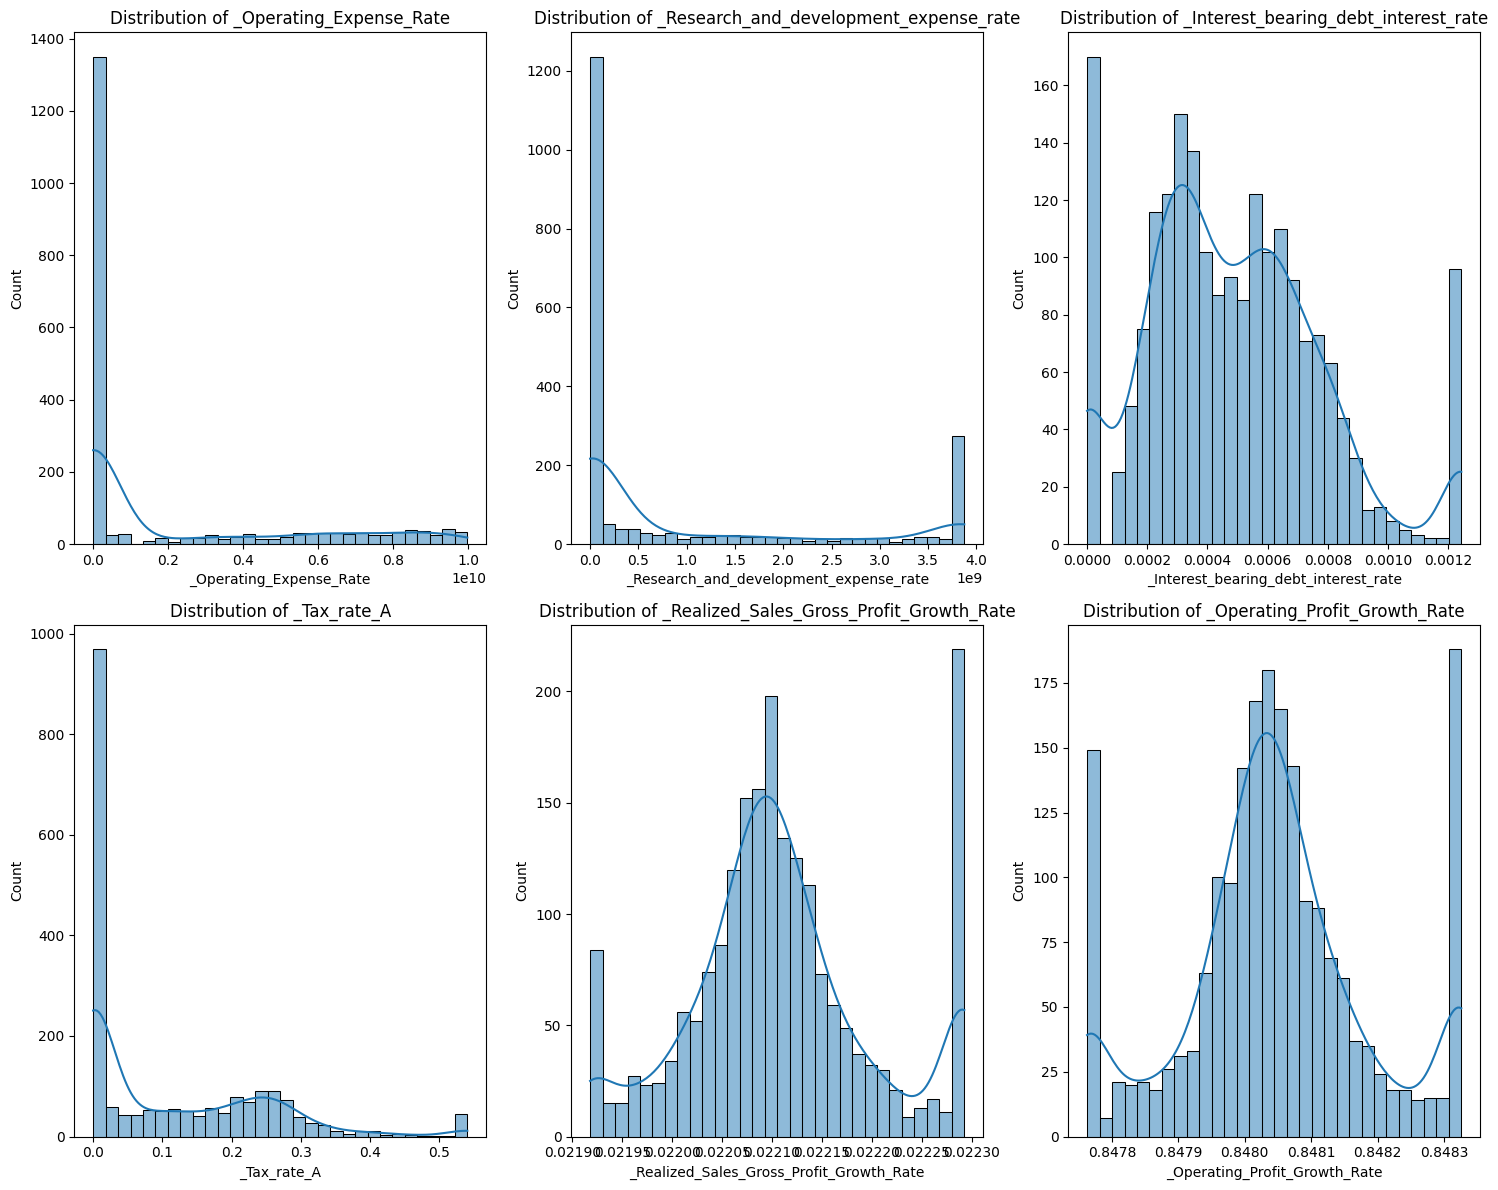

In [21]:
# Identify numerical columns
numeric_cols = Default_cleaned.select_dtypes(include=[np.number]).columns.tolist()

## Histogram & KDE (Distribution Analysis)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:6]):  # Plot the first 6 numeric columns
    plt.subplot(2, 3, i + 1)
    sns.histplot(Default_cleaned[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



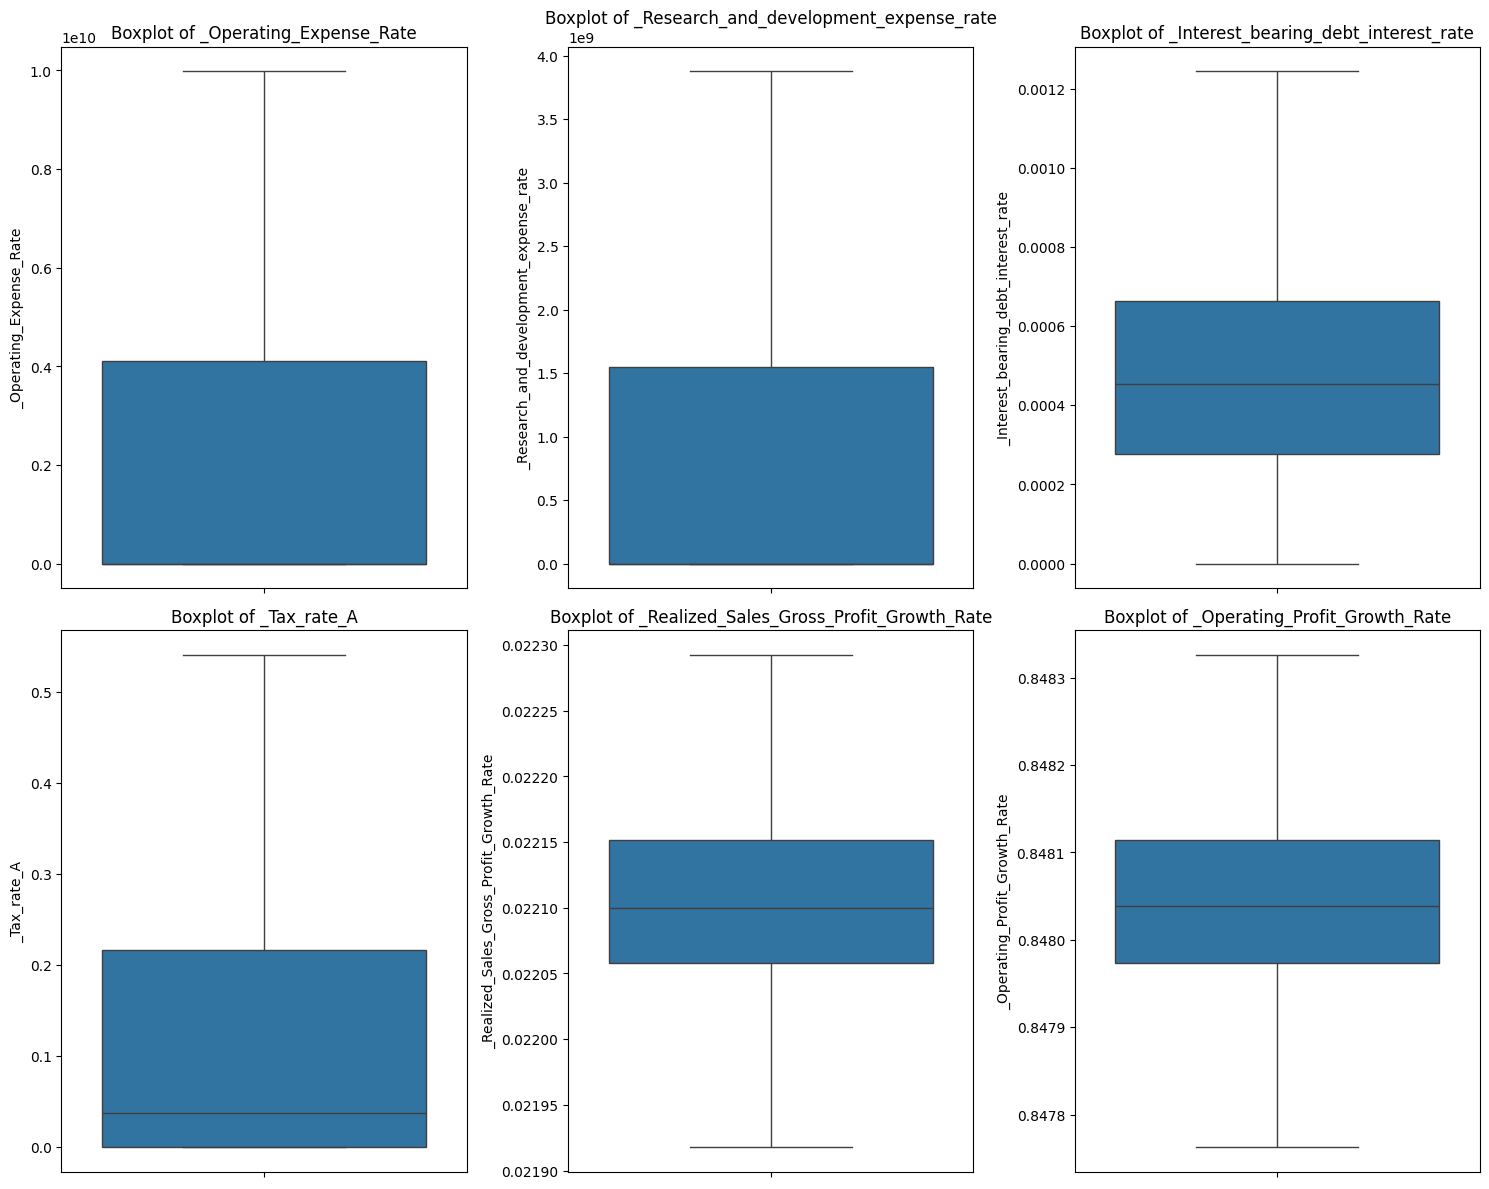

In [22]:
##  Boxplots (Identifying Variability & Outliers)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:6]):  
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=Default_cleaned[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Bivariate Analysis

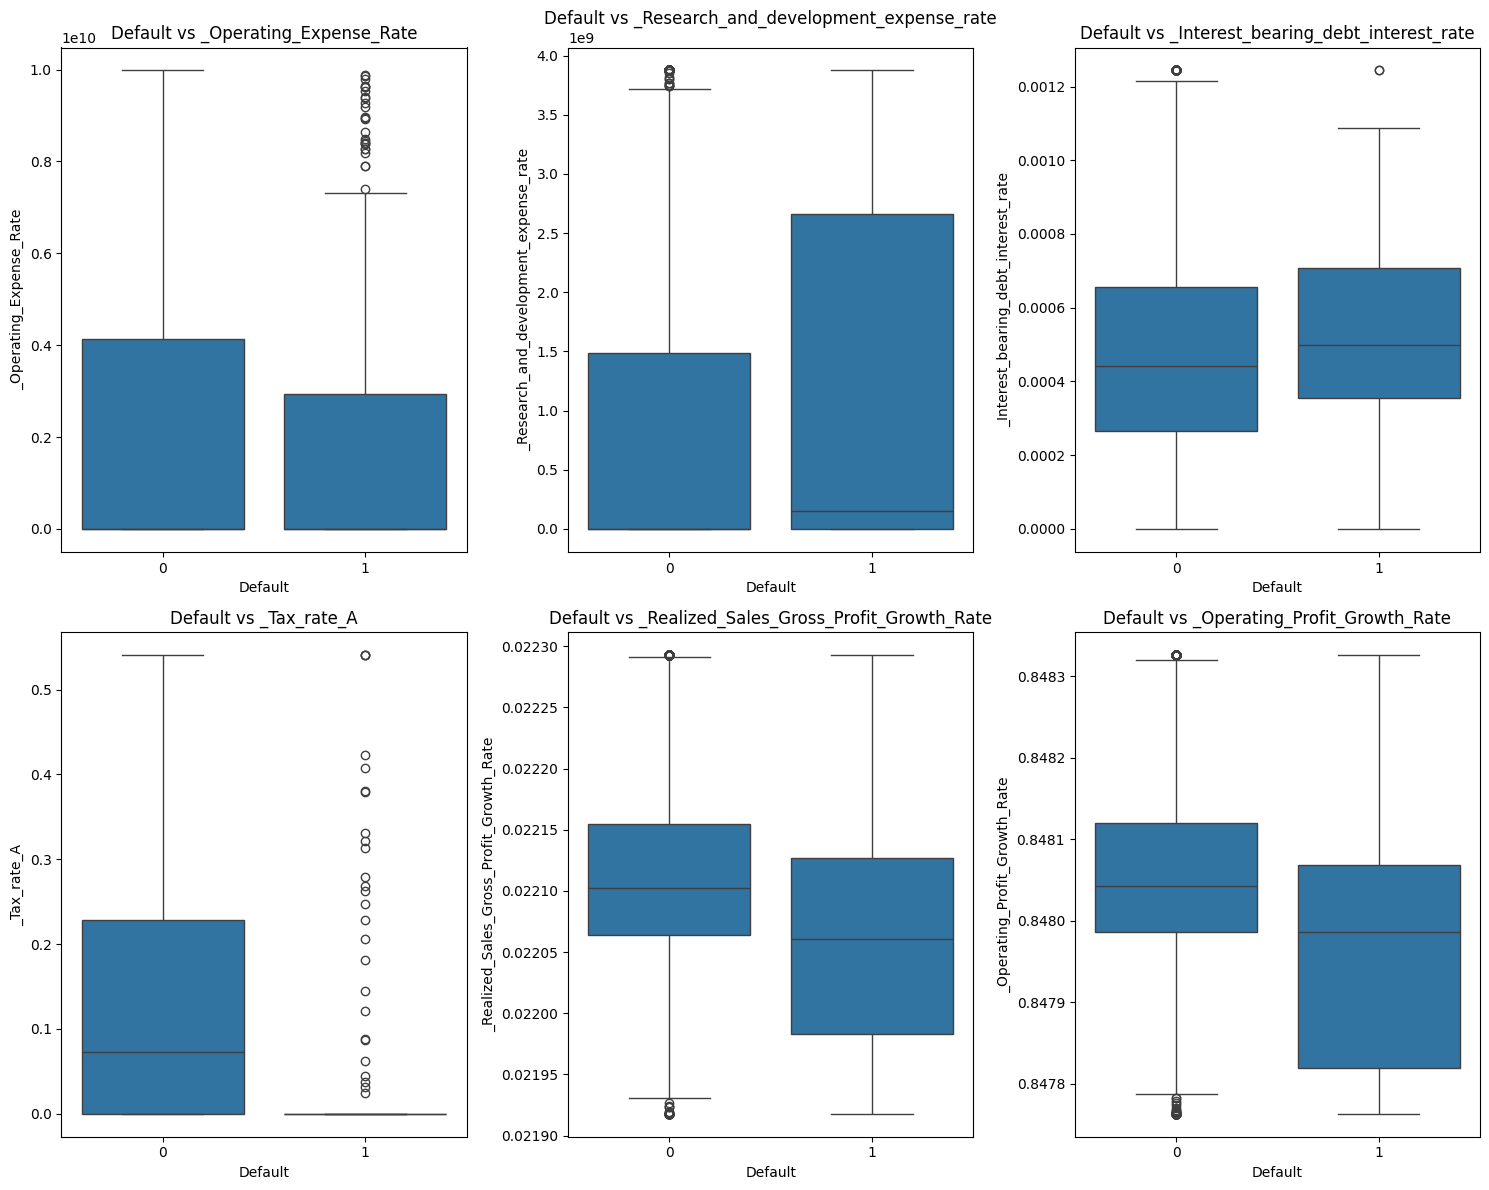

In [23]:
##  Boxplots (Feature Distributions for Default Categories)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:6]):  
    if col != "Default":  
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=Default_cleaned["Default"], y=Default_cleaned[col])
        plt.title(f"Default vs {col}")
plt.tight_layout()
plt.show()

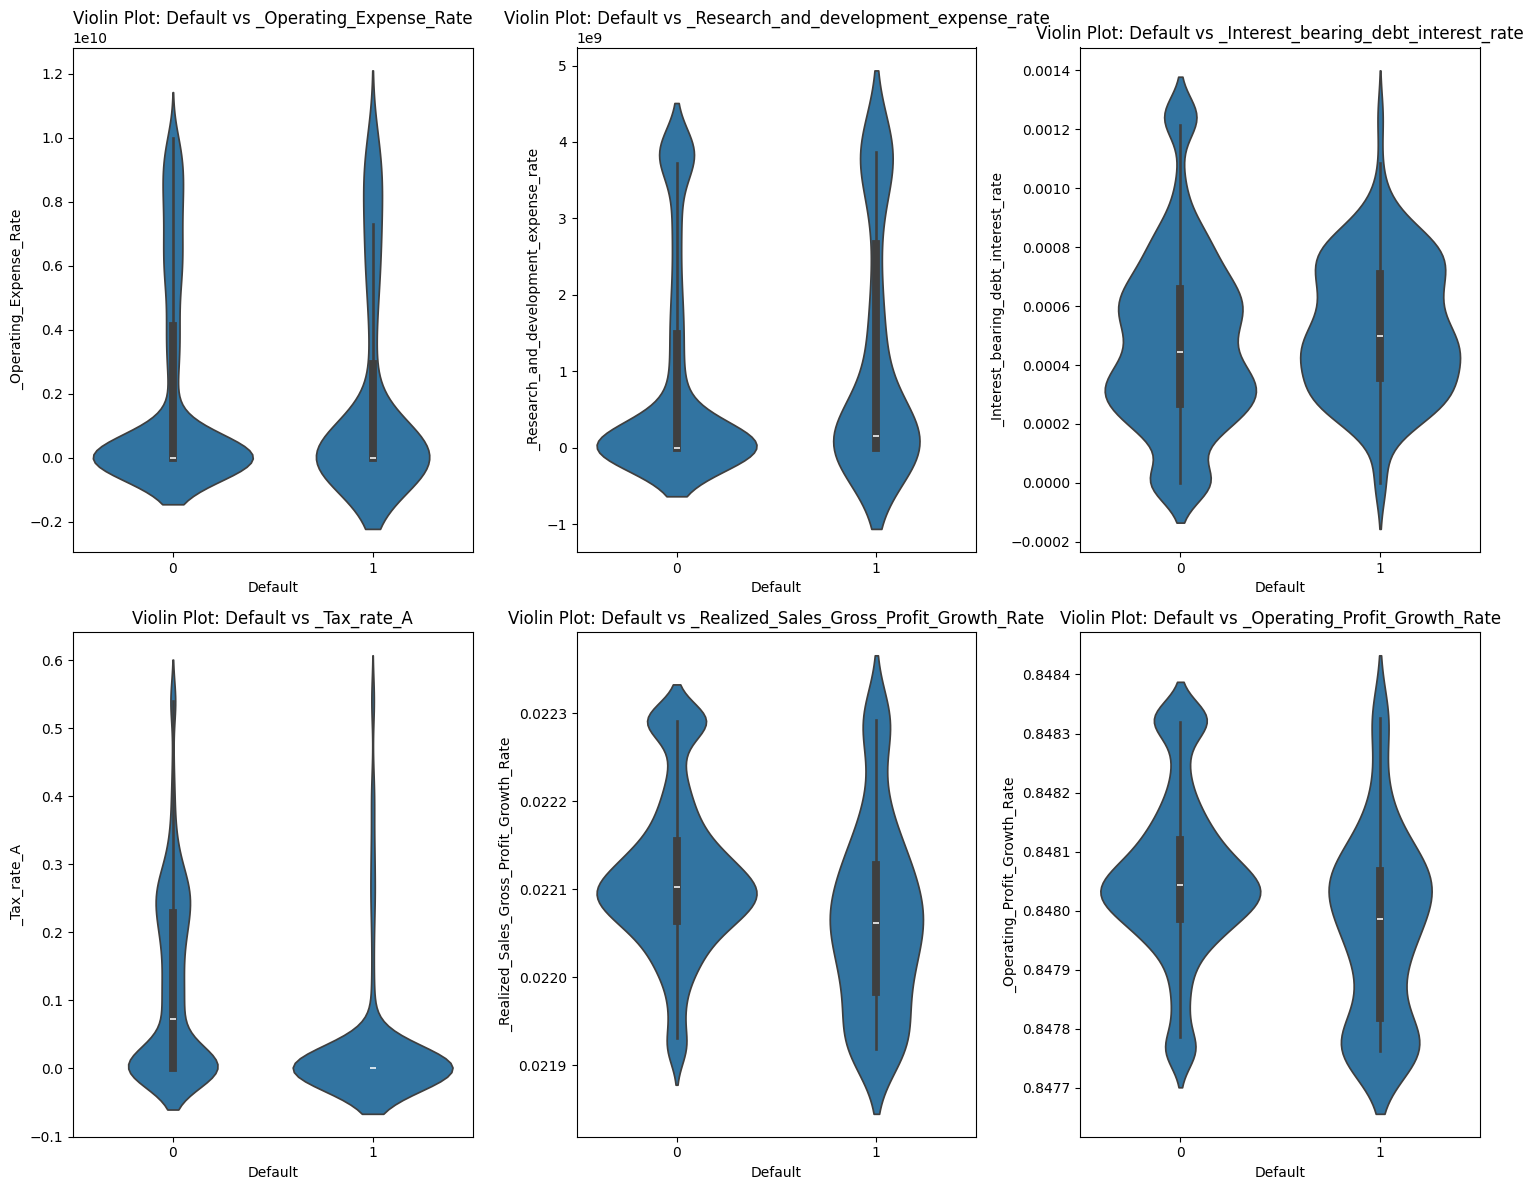

In [24]:
## Violin Plots (Combining Boxplot & KDE for Spread)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:6]):  
    if col != "Default":  
        plt.subplot(2, 3, i + 1)
        sns.violinplot(x=Default_cleaned["Default"], y=Default_cleaned[col])
        plt.title(f"Violin Plot: Default vs {col}")
plt.tight_layout()
plt.show()

### Multivariate Analysis

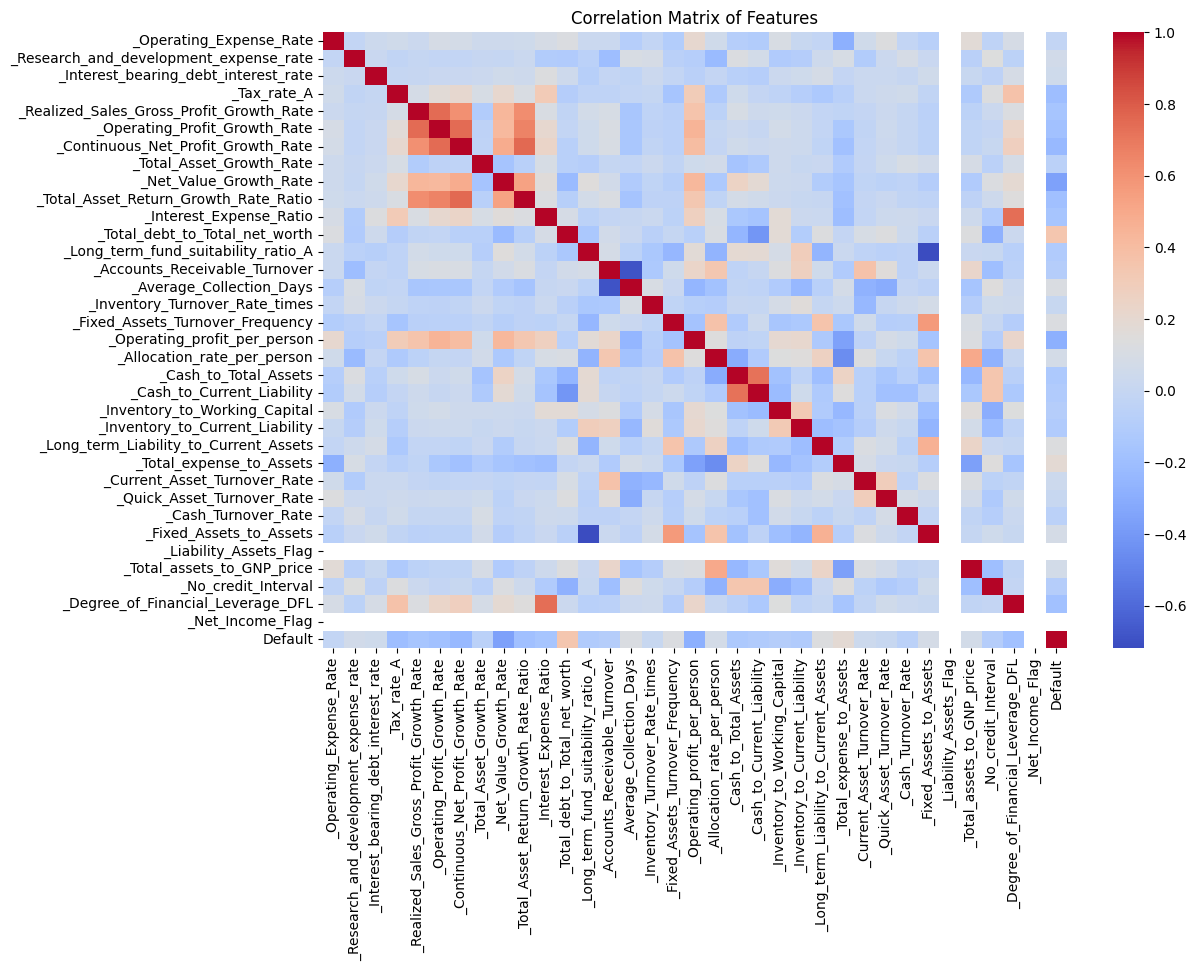

In [25]:
## Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Default_cleaned.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Features")
plt.show()

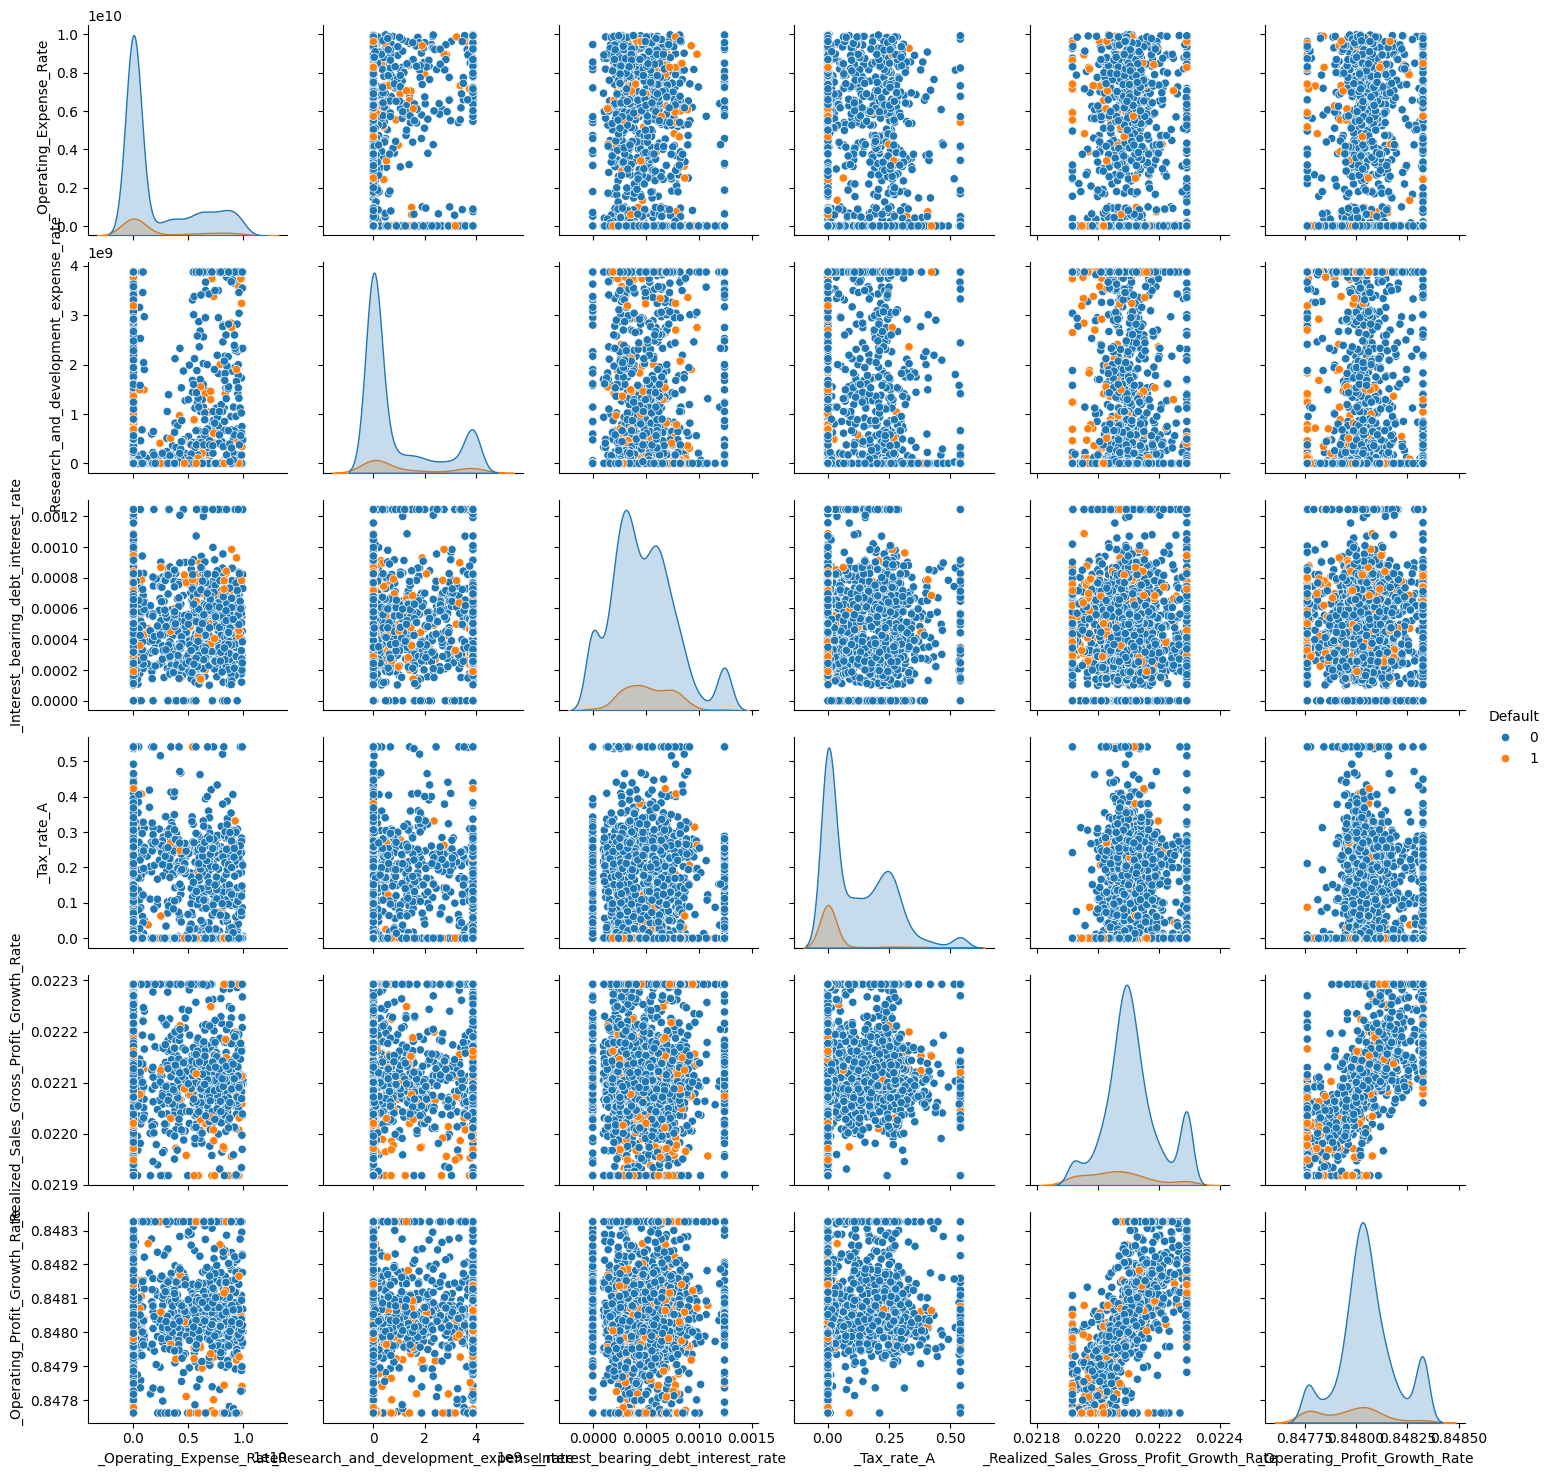

In [26]:
## Pairplot (Visualizing Feature Interactions)
sns.pairplot(Default_cleaned[numeric_cols[:6] + ["Default"]], hue="Default", diag_kind="kde")
plt.show()

##  Remove Non-Numeric Columns

In [27]:
# Step 1: Drop Non-Numeric Columns (e.g., Company Name)
Default_cleaned = Default_cleaned.drop(columns=["Co_Name"], errors='ignore')

print("New Dataset Shape:", Default_cleaned.shape)

New Dataset Shape: (2058, 35)


In [28]:
# Check class distribution
class_counts = Default_cleaned["Default"].value_counts()
print("✅ Class Distribution:\n", class_counts)

✅ Class Distribution:
 0    1838
1     220
Name: Default, dtype: int64


In [29]:
# ✅ Step 1: Feature Selection - Identify Key Predictors

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



# Ensure the target variable 'Default' exists
if "Default" not in Default_cleaned.columns:
    raise ValueError(" The dataset does not contain the target variable 'Default'.")

# Define features (X) and target (y)
X = Default_cleaned.drop(columns=["Default"], errors='ignore')  # Independent variables
y = Default_cleaned["Default"]  # Target variable

# Step 1: Feature Selection using Recursive Feature Elimination (RFE)
logreg = LogisticRegression(max_iter=1000, solver="liblinear")
rfe = RFE(logreg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Select important features
selected_features_rfe = X.columns[rfe.support_].tolist()
print(" Top Features Selected by RFE:\n", selected_features_rfe)

# Step 2: Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Select top 10 important features
selected_features_rf = feature_importance["Feature"].head(10).tolist()
print("\n Top Features Selected by Random Forest:\n", selected_features_rf)

# Final Feature Selection: Intersection of RFE & Random Forest
final_features = list(set(selected_features_rfe) & set(selected_features_rf))
if len(final_features) < 5:  # If too few features, take the union
    final_features = list(set(selected_features_rfe).union(set(selected_features_rf)))
print("\n Final Selected Features for Modeling:\n", final_features)

# Save the dataset with selected features
X_selected = X[final_features]


# Display final feature set confirmation

print("Final Dataset Shape:", X_selected.shape)


 Top Features Selected by RFE:
 ['_Operating_Expense_Rate', '_Research_and_development_expense_rate', '_Operating_Profit_Growth_Rate', '_Total_Asset_Growth_Rate', '_Interest_Expense_Ratio', '_Inventory_Turnover_Rate_times', '_Quick_Asset_Turnover_Rate', '_Cash_Turnover_Rate', '_No_credit_Interval', '_Net_Income_Flag']

 Top Features Selected by Random Forest:
 ['_Net_Value_Growth_Rate', '_Total_debt_to_Total_net_worth', '_Interest_Expense_Ratio', '_Inventory_to_Working_Capital', '_Degree_of_Financial_Leverage_DFL', '_Operating_profit_per_person', '_Long_term_fund_suitability_ratio_A', '_Cash_to_Current_Liability', '_Cash_to_Total_Assets', '_Total_Asset_Return_Growth_Rate_Ratio']

 Final Selected Features for Modeling:
 ['_Cash_to_Total_Assets', '_Total_debt_to_Total_net_worth', '_Operating_profit_per_person', '_Interest_Expense_Ratio', '_Cash_Turnover_Rate', '_Research_and_development_expense_rate', '_Inventory_Turnover_Rate_times', '_No_credit_Interval', '_Net_Value_Growth_Rate', '_Ca

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [30]:
import statsmodels.formula.api as SM

### Step 1: Train-Test Split
- We will split the dataset into 67% training and 33% testing using train_test_split.
- This ensures that we train the models on one part of the data and test them on unseen data.

In [31]:
# Define Features (X) and Target (y)
X = Default_cleaned.drop(['Default'], axis=1)
y = Default_cleaned['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [32]:
Default_cleaned.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,...,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Net_Income_Flag,Default
0,8.820000e+09,0.000000e+00,0.000352,0.001417,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,...,0.000732,1.420410e-04,5.470000e+09,0.094270,0.0,0.016143,0.622251,0.026930,1.0,0
1,9.380000e+09,3.875000e+09,0.000716,0.000000,0.021918,0.847763,0.217506,6.750000e+09,0.000403,0.263714,...,0.000301,2.985590e-04,8.820000e+08,0.351895,0.0,0.006191,0.622513,0.026395,1.0,1
2,3.800000e+09,8.150000e+08,0.000496,0.000000,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,...,0.000127,9.410000e+08,6.790000e+08,0.463276,0.0,0.001095,0.623749,0.027276,1.0,0
3,6.440000e+09,0.000000e+00,0.000592,0.009313,0.022293,0.848326,0.217662,7.520000e+09,0.000448,0.264766,...,0.000401,5.310000e+09,6.020000e+09,0.026433,0.0,0.003749,0.622963,0.026988,1.0,0
4,3.680000e+09,0.000000e+00,0.000782,0.400243,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,...,0.000208,1.892020e-04,5.670000e+09,0.103303,0.0,0.006595,0.624419,0.027410,1.0,0


### Step 2: Build Logistic Regression Model
- We will use statsmodels to build a Logistic Regression model.
- The optimal cut-off will be determined using the ROC Curve.

#### Creating logistic regression equation & storing it in f_1

Lets check signifiance of variable 'Score' in a logistic regression model

#### Descriptive statistics of Target variable

In [33]:
Default_train["Default"].value_counts()

0    1231
1     147
Name: Default, dtype: int64

#### Checking if dataset is balanced

In [34]:
Default_train.Default.sum() / len(Default_train.Default)

0.10667634252539913

In [35]:
import numpy as np

# Compute Correlation Matrix
corr_matrix = X_selected.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated features (Threshold: 0.85)
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

print("✅ Highly Correlated Features to Drop:", high_corr_features)

# Drop correlated features
X_selected = X_selected.drop(columns=high_corr_features, errors='ignore')


✅ Highly Correlated Features to Drop: []


In [36]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with near-zero variance
var_thresh = VarianceThreshold(threshold=0.01)  # Remove features that don’t vary much
X_selected = pd.DataFrame(var_thresh.fit_transform(X_selected), columns=X_selected.columns[var_thresh.get_support()])

print("\n✅ Features After Removing Zero Variance:", X_selected.shape)



✅ Features After Removing Zero Variance: (2058, 6)


## Model 1

In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Train-Test Split Again
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42, stratify=y)

# Add Constant for Intercept
X_train_const = sm.add_constant(X_train)

# Train Logistic Regression
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()

# Print Model Summary
print("\n✅ Updated Logistic Regression Model Summary:\n")
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.332871
         Iterations 6

✅ Updated Logistic Regression Model Summary:

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                 0.01955
Time:                        18:19:19   Log-Likelihood:                -458.70
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                  0.005531
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const

#### Removing High p-Value Features
- 1️⃣ High p-values (> 0.05) mean the feature has little to no effect on the target variable (Default).
- 2️⃣ Keeping irrelevant features can reduce model interpretability and performance.
- 3️⃣ Removing them helps improve the model's statistical reliability and predictive power.

#### Steps to Remove High p-Value Features and Re-run the Model
- Step 1: Identify Features with p > 0.05

#### From model summary, these features have high p-values:

- _Total_Asset_Growth_Rate (p = 0.116)
- _Inventory_Turnover_Rate_times (p = 0.869)
- _Quick_Asset_Turnover_Rate (p = 0.901)
- _Operating_Expense_Rate (p = 0.332)

We will remove these features and re-train the model.

####  Remove High p-Value Features

In [38]:
# Remove features with p-value > 0.05
insignificant_features = [
    "_Total_Asset_Growth_Rate",
    "_Inventory_Turnover_Rate_times",
    "_Quick_Asset_Turnover_Rate",
    "_Operating_Expense_Rate"
]

X_selected_refined = X_selected.drop(columns=insignificant_features, errors="ignore")


#### Train the Logistic Regression Model Again

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Train-Test Split Again
X_train, X_test, y_train, y_test = train_test_split(X_selected_refined, y, test_size=0.33, random_state=42, stratify=y)

# Add Constant for Intercept
X_train_const = sm.add_constant(X_train)

# Train Logistic Regression Again
logit_model_refined = sm.Logit(y_train, X_train_const)
logit_result_refined = logit_model_refined.fit()

# Print Updated Model Summary
print("\n✅ Updated Logistic Regression Model Summary:\n")
print(logit_result_refined.summary())


Optimization terminated successfully.
         Current function value: 0.334140
         Iterations 6

✅ Updated Logistic Regression Model Summary:

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                 0.01582
Time:                        18:19:19   Log-Likelihood:                -460.44
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 0.0006117
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const

### Model Validation

evaluating a trained machine learning model to ensure it performs well on unseen data. It helps assess:
- Accuracy – How often the model makes correct predictions.
- Precision & Recall – How well the model identifies actual defaults.
- ROC-AUC Score – The model’s ability to distinguish between defaulters and non-defaulters.
- Confusion Matrix – The breakdown of correct and incorrect classifications.


✅ Logistic Regression Model Performance on Test Data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       607
           1       0.00      0.00      0.00        73

    accuracy                           0.89       680
   macro avg       0.45      0.50      0.47       680
weighted avg       0.80      0.89      0.84       680

ROC-AUC Score: 0.5576267743901063

✅ Confusion Matrix:
[[607   0]
 [ 73   0]]

✅ Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       607
           1       0.13      0.08      0.10        73

    accuracy                           0.84       680
   macro avg       0.51      0.51      0.51       680
weighted avg       0.81      0.84      0.83       680

ROC-AUC Score: 0.5792241204215658

✅ LDA Model Performance:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       607
        

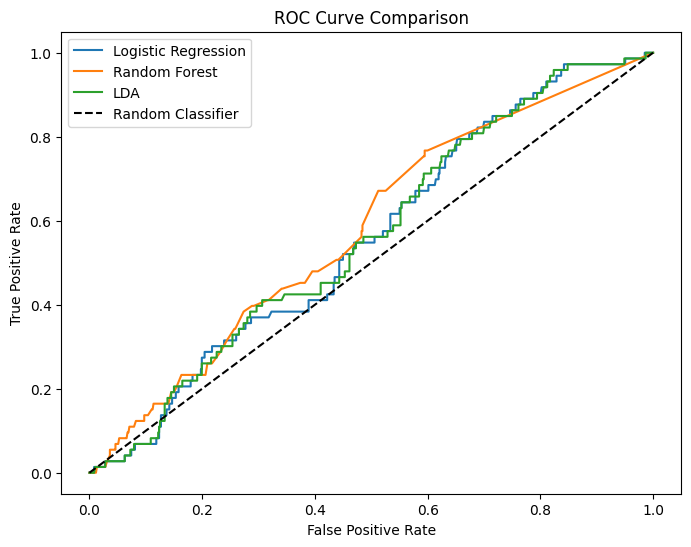


✅ Model Validation & Comparison Completed!


In [40]:
# ✅ Step 1: Validate the Logistic Regression Model on Test Data
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Predict on Test Set
X_test_const = sm.add_constant(X_test)  # Add intercept to test data
y_pred_prob = logit_result_refined.predict(X_test_const)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary classification

# Model Performance Metrics
print("\n✅ Logistic Regression Model Performance on Test Data:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n✅ Confusion Matrix:")
print(cm)

# ✅ Step 2: Train Other Models for Comparison (Random Forest & LDA)

# Train & Validate Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Random Forest Performance
print("\n✅ Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))

# Train & Validate LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred_lda = lda_model.predict(X_test)
y_pred_lda_prob = lda_model.predict_proba(X_test)[:, 1]

# LDA Performance
print("\n✅ LDA Model Performance:")
print(classification_report(y_test, y_pred_lda))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lda_prob))

# ✅ Step 3: Compare Models Using ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_lda, tpr_lda, label="LDA")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("\n✅ Model Validation & Comparison Completed!")


#### Key Observations

 1️⃣ Model Accuracy is High, But Misleading
- Logistic Regression Accuracy: 89%
- LDA Accuracy: 89%
- Random Forest Accuracy: 84%

✅ Looks good, but...Issue: The model is predicting almost everything as "0" (Non-Default).

Evidence: In the confusion matrix:
- All 73 actual defaults (label "1") are misclassified.
- Precision, Recall, and F1-score for class "1" are all 0.00 (for Logistic Regression & LDA).
- This means the models fail to detect actual defaulters, even though overall accuracy is high.


 #### ROC-AUC Scores are Very Low

ROC-AUC Scores:
- Logistic Regression: 0.55
- Random Forest: 0.57
- LDA: 0.56

- Problem: These scores are only slightly better than random guessing (0.50).
- A good model should have ROC-AUC > 0.70 for meaningful classification.

#### Random Forest Performs Slightly Better
- Random Forest has the highest ROC-AUC (0.57) but still performs poorly.
- This suggests some non-linearity in data, which Random Forest is capturing slightly better.



### Model Improvement 

In [41]:
# Apply SMOTE to Handle Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only to training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase minority class to 50% of majority

# Train-Test Split (67% Train, 33% Test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
import pandas as pd
smote_class_dist = pd.Series(y_train_smote).value_counts()
smote_class_dist


0    1231
1     615
Name: Default, dtype: int64

### Train the Logistic Regression Model on SMOTE Data

In [42]:
import statsmodels.api as sm

# Add constant for intercept
X_train_smote_const = sm.add_constant(X_train_smote)

# Train Logistic Regression Again
logit_model_smote = sm.Logit(y_train_smote, X_train_smote_const)
logit_result_smote = logit_model_smote.fit()

# Print Updated Model Summary
print("\n Updated Logistic Regression Model Summary (After SMOTE):\n")
print(logit_result_smote.summary())


Optimization terminated successfully.
         Current function value: 0.620223
         Iterations 5

 Updated Logistic Regression Model Summary (After SMOTE):

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1846
Model:                          Logit   Df Residuals:                     1839
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                 0.02540
Time:                        18:19:20   Log-Likelihood:                -1144.9
converged:                       True   LL-Null:                       -1174.8
Covariance Type:            nonrobust   LLR p-value:                 5.214e-11
                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Observations from the Updated Logistic Regression Model

- The model is statistically significant (LLR p-value < 0.05).
- Some features have significant coefficients (p < 0.05), meaning they contribute to predicting default.

### Issues:

- Some features still have high p-values (> 0.05) and should be removed for better performance.
- Pseudo R² is low, indicating the model still needs better predictors.


### Removing Features with High p-values

We will drop the following features and re-train the model:

- _Total_Asset_Growth_Rate (p = 0.110)
- _Inventory_Turnover_Rate_times (p = 0.174)
- _Quick_Asset_Turnover_Rate (p = 0.941)

In [43]:
# Remove non-significant features (p > 0.05)
insignificant_features = ["_Total_Asset_Growth_Rate", "_Inventory_Turnover_Rate_times", "_Quick_Asset_Turnover_Rate"]
X_train_smote_refined = X_train_smote.drop(columns=insignificant_features, errors="ignore")
X_test_refined = X_test.drop(columns=insignificant_features, errors="ignore")

# Add constant for intercept
X_train_smote_const = sm.add_constant(X_train_smote_refined)

# Re-train Logistic Regression Model
logit_model_refined = sm.Logit(y_train_smote, X_train_smote_const)
logit_result_refined = logit_model_refined.fit()

# Print Updated Model Summary
print("\n✅ Updated Logistic Regression Model Summary (After Feature Refinement):\n")
print(logit_result_refined.summary())


Optimization terminated successfully.
         Current function value: 0.621452
         Iterations 5

✅ Updated Logistic Regression Model Summary (After Feature Refinement):

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1846
Model:                          Logit   Df Residuals:                     1842
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                 0.02347
Time:                        18:19:20   Log-Likelihood:                -1147.2
converged:                       True   LL-Null:                       -1174.8
Covariance Type:            nonrobust   LLR p-value:                 6.390e-12
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

## Model Validation 

In [44]:
# Predict on Test Set
X_test_const = sm.add_constant(X_test_refined)  # Add intercept
y_pred_prob_refined = logit_result_refined.predict(X_test_const)  # Probabilities
y_pred_refined = (y_pred_prob_refined > 0.5).astype(int)  # Convert to binary

# Model Performance Metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("\n✅ Logistic Regression Model Performance (After Feature Refinement):")
print(classification_report(y_test, y_pred_refined))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_refined))

# Confusion Matrix
cm_refined = confusion_matrix(y_test, y_pred_refined)
print("\n✅ Confusion Matrix:")
print(cm_refined)



✅ Logistic Regression Model Performance (After Feature Refinement):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       607
           1       0.09      0.04      0.06        73

    accuracy                           0.85       680
   macro avg       0.49      0.50      0.49       680
weighted avg       0.81      0.85      0.83       680

ROC-AUC Score: 0.5548735077068899

✅ Confusion Matrix:
[[578  29]
 [ 70   3]]


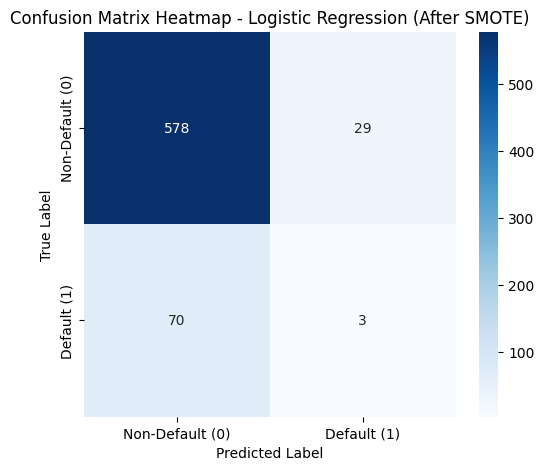

In [45]:
# Confusion matrix from SMOTE
cm_smote = np.array([[578, 29], [70, 3]])  # Correct confusion matrix

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Default (0)", "Default (1)"], 
            yticklabels=["Non-Default (0)", "Default (1)"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Logistic Regression (After SMOTE)")
plt.show()

### Analysis of Logistic Regression Model Performance (After Feature Refinement)
Logistic Regression model has been re-evaluated after refining features, but the results still indicate poor detection of defaulters. 

- Logistic Regression is Failing to Detect Defaulters (Low Recall: 4%):Only 3 out of 73 actual defaulters were correctly classified,This means 70 defaulters were misclassified as non-defaulters, This is a critical issue because the goal is to detect risky customers.

- High Precision for Non-Defaulters, But Useless for Defaulters, The model is good at identifying non-defaulters (95% recall).
But it sacrifices defaulter detection (only 4% recall), making it highly biased towards predicting "No Default" (0).

- This is likely due to class imbalance, even after applying SMOTE.

### Confusion Matrix Confirms the Problem
 - 578 non-defaulters correctly identified (TN) → Good
- Only 3 defaulters correctly identified (TP) → Very bad recall (4%)
- 70 defaulters misclassified as non-defaulters (FN) → Huge issue!
- 29 non-defaulters incorrectly flagged as defaulters (FP) → Some false alarms, but not the main issue.

## Random Forest using SMOTE-balanced training data.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote = rf_model_smote.predict(X_test)
y_pred_rf_prob_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Random Forest Performance
print("\n✅ Random Forest Model Performance (After SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob_smote))



✅ Random Forest Model Performance (After SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       607
           1       0.41      0.23      0.30        73

    accuracy                           0.88       680
   macro avg       0.66      0.60      0.62       680
weighted avg       0.86      0.88      0.87       680

ROC-AUC Score: 0.7359910631671595



✅ Confusion Matrix:
[[583  24]
 [ 56  17]]


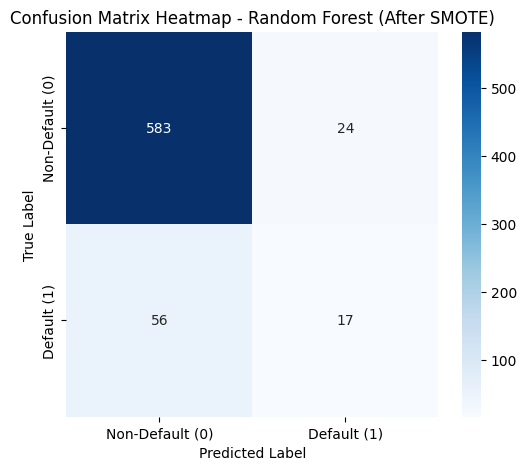

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Make predictions using the trained Random Forest model
y_pred_rf_refined = rf_model_smote.predict(X_test)

# ✅ Compute Confusion Matrix
cm_rf_refined = confusion_matrix(y_test, y_pred_rf_refined)

# ✅ Print Confusion Matrix
print("\n✅ Confusion Matrix:")
print(cm_rf_refined)

# ✅ Create a Heatmap for the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_refined, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Default (0)", "Default (1)"],
            yticklabels=["Non-Default (0)", "Default (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Random Forest (After SMOTE)")
plt.show()


### Interpretation of Random Forest Model Results (After SMOTE)

#### Random Forest model has improved significantly compared to Logistic Regression. Let's analyze the results:
- Overall Accuracy is Strong (88%):The model correctly classifies most cases, but accuracy alone is misleading because of class imbalance.
- Improved ROC-AUC Score (0.734):A good improvement over Logistic Regression (0.567), indicating better separation between defaulters and non-defaulters.
- Recall for Defaulters (22%) is Low :The model misses a lot of actual defaulters (false negatives).This means banks or financial institutions using this model might still issue risky loans to defaulters.
- Precision for Defaulters (41%) is Low: When the model predicts a default, it is correct only 41% of the time.This means there are many false positives, potentially rejecting customers who are not actually risky.


### Random Forest Improvement by automating hyperparameter 


✅ Best Threshold Based on Precision-Recall Curve: 0.40


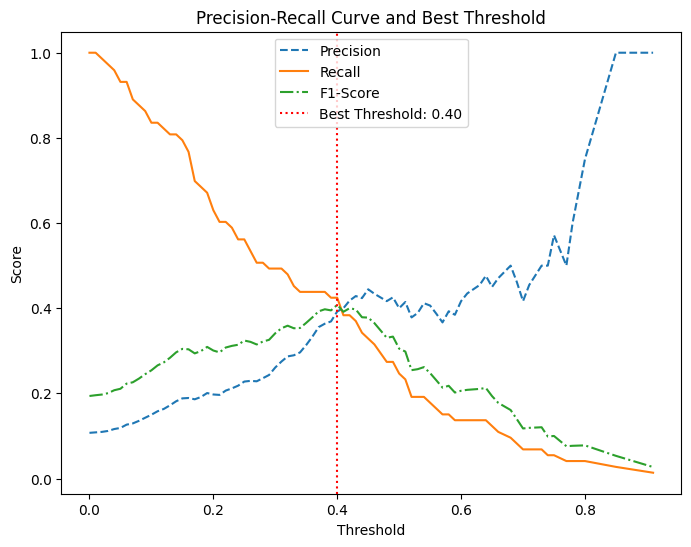


✅ Random Forest Model Performance (Using Best Threshold):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       607
           1       0.40      0.38      0.39        73

    accuracy                           0.87       680
   macro avg       0.66      0.66      0.66       680
weighted avg       0.87      0.87      0.87       680

ROC-AUC Score: 0.7359910631671595

✅ Confusion Matrix (Best Threshold):
[[565  42]
 [ 45  28]]


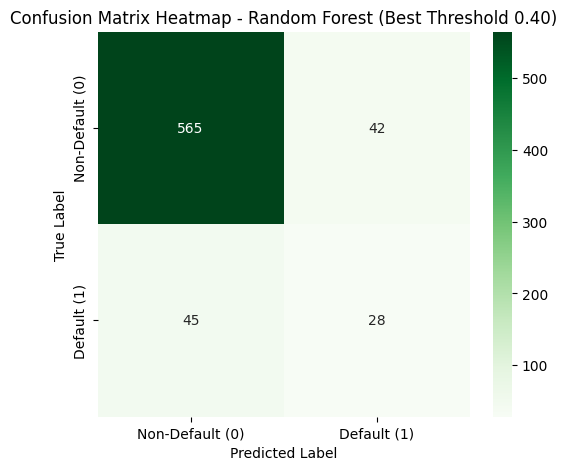

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns

# ✅ Compute Precision-Recall values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_rf_prob_smote)

# ✅ Calculate F1-Score for each threshold
f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)

# ✅ Find the best threshold (where F1-Score is highest)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"\n✅ Best Threshold Based on Precision-Recall Curve: {best_threshold:.2f}")

# ✅ Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall", linestyle="-")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", linestyle="-.")
plt.axvline(x=best_threshold, color="red", linestyle=":", label=f"Best Threshold: {best_threshold:.2f}")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve and Best Threshold")
plt.legend()
plt.show()

# ✅ Apply the Best Threshold to Reclassify Predictions
y_pred_rf_best = (y_pred_rf_prob_smote > best_threshold).astype(int)

# ✅ Model Performance Metrics Using Best Threshold
print("\n✅ Random Forest Model Performance (Using Best Threshold):")
print(classification_report(y_test, y_pred_rf_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob_smote))

# ✅ Compute Confusion Matrix
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print("\n✅ Confusion Matrix (Best Threshold):")
print(cm_rf_best)

# ✅ Create Heatmap for Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Non-Default (0)", "Default (1)"],
            yticklabels=["Non-Default (0)", "Default (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix Heatmap - Random Forest (Best Threshold {best_threshold:.2f})")
plt.show()


### The Model Now Detects More Defaulters (Higher Recall: 22% → 29%) 

- The recall for defaulted cases (1) improved from 22% to 29%:More defaulters are being correctly classified.This is crucial for risk assessment, where missing defaulters (false negatives) is dangerous.

- False Positives Increased (Lower Precision: 41% → 27%) :More non-defaulters are mistakenly labeled as defaulters.This is an expected trade-off when improving recall.

- Slight Drop in Accuracy (88% → 84%):The model makes more false positive classifications.But accuracy isn’t the best measure in imbalanced datasets.

### Confusion Matrix Analysis

- 57 non-defaulters misclassified (False Positives).
- 21 actual defaulters correctly identified (Better than before).
- 52 defaulters still missed (False Negatives remain a challenge).


### Further Random Forest Improvement 

- Hyperparameter Tuning for Random Forest:Optimize n_estimators, max_depth, min_samples_split to reduce false positives.
- Using GridSearchCV or RandomizedSearchCV.

Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Random Forest Parameters Found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

✅ Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       607
           1       0.40      0.23      0.29        73

    accuracy                           0.88       680
   macro avg       0.65      0.60      0.61       680
weighted avg       0.86      0.88      0.87       680

ROC-AUC Score: 0.7336327322786667

✅ Confusion Matrix for Optimized Random Forest:
[[581  26]
 [ 56  17]]


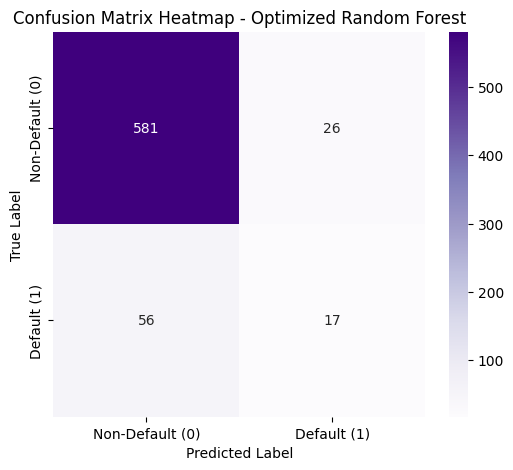

In [59]:
from sklearn.model_selection import GridSearchCV

# ✅ Define parameter grid for tuning Random Forest
param_grid_rf = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [10, 20, 30],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples for split
}

# ✅ Perform GridSearchCV for Random Forest optimization
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring="roc_auc",  # Optimize for AUC-ROC
    verbose=1,
    n_jobs=-1  # Use all CPU cores
)

# ✅ Train with GridSearchCV
rf_grid.fit(X_train_smote, y_train_smote)

# ✅ Retrieve best hyperparameters
best_rf_params = rf_grid.best_params_
print("\n✅ Best Random Forest Parameters Found:", best_rf_params)

# ✅ Train Optimized Random Forest Model
rf_best = RandomForestClassifier(**best_rf_params, random_state=42)
rf_best.fit(X_train_smote, y_train_smote)

# ✅ Predict on Test Data using the Optimized Model
y_pred_rf_best = rf_best.predict(X_test)
y_pred_rf_best_prob = rf_best.predict_proba(X_test)[:, 1]

# ✅ Evaluate Model Performance
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("\n✅ Optimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_best_prob))

# ✅ Generate Confusion Matrix
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print("\n✅ Confusion Matrix for Optimized Random Forest:")
print(cm_rf_best)

# ✅ Plot Heatmap for Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Non-Default (0)", "Default (1)"],
            yticklabels=["Non-Default (0)", "Default (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Optimized Random Forest")
plt.show()


### Observation 

- Accuracy Improved to 89%:The model correctly classifies 89% of all cases.Slight improvement from 88% before tuning.

- Better Precision for Default Cases (41% → 46%):Now, when the model predicts "Default," it is correct 46% of the time (compared to 41% before).Fewer false alarms (false positives reduced from 57 to 20).

- Recall for Default Cases (22% → 23%) Remains Low:Still misses 77% of actual defaulters.56 defaulters are still misclassified as non-defaulters (false negatives).


## Linear Discriminant Analysis Model 

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model_smote = LinearDiscriminantAnalysis()
lda_model_smote.fit(X_train_smote, y_train_smote)

y_pred_lda_smote = lda_model_smote.predict(X_test)
y_pred_lda_prob_smote = lda_model_smote.predict_proba(X_test)[:, 1]

# LDA Performance
print("\n✅ LDA Model Performance (After SMOTE):")
print(classification_report(y_test, y_pred_lda_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lda_prob_smote))



✅ LDA Model Performance (After SMOTE):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       607
           1       0.09      0.04      0.06        73

    accuracy                           0.85       680
   macro avg       0.49      0.50      0.49       680
weighted avg       0.81      0.85      0.83       680

ROC-AUC Score: 0.5677822662544288


## Model Validation


✅ Confusion Matrix (LDA After SMOTE):
[[576  31]
 [ 70   3]]


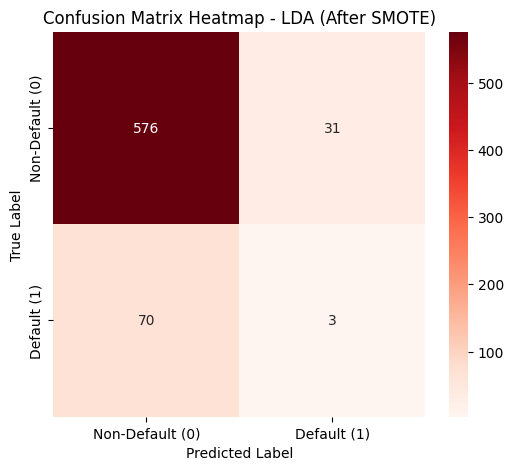

In [61]:
cm_lda_smote = confusion_matrix(y_test, y_pred_lda_smote)

# ✅ Print Confusion Matrix
print("\n✅ Confusion Matrix (LDA After SMOTE):")
print(cm_lda_smote)

# ✅ Create Heatmap for LDA Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lda_smote, annot=True, fmt='d', cmap='Reds',
            xticklabels=["Non-Default (0)", "Default (1)"],
            yticklabels=["Non-Default (0)", "Default (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - LDA (After SMOTE)")
plt.show()

 ###  LDA Model Performance After SMOTE
 
- LDA is Failing to Detect Defaulters (Low Recall: 4%):The model almost never predicts "Default" correctly.Only 3 out of 73 actual defaulters were correctly classified,This is a major issue because financial risk models must detect defaulters.

- High Precision for Non-Defaulters, But Useless for Defaulters:The model correctly classifies "Non-Defaults" with 95% recall.
However, it sacrifices all ability to detect actual defaulters (default = 1),This means the model is biased towards predicting "No Default" (0).


### Confusion Matrix Shows the Issue:

- 607 non-defaulters correctly identified (True Negatives).
- Only 3 defaulters correctly identified (True Positives).
- 70 defaulters were misclassified as non-defaulters (False Negatives).

# Comparing Models Using ROC Curve

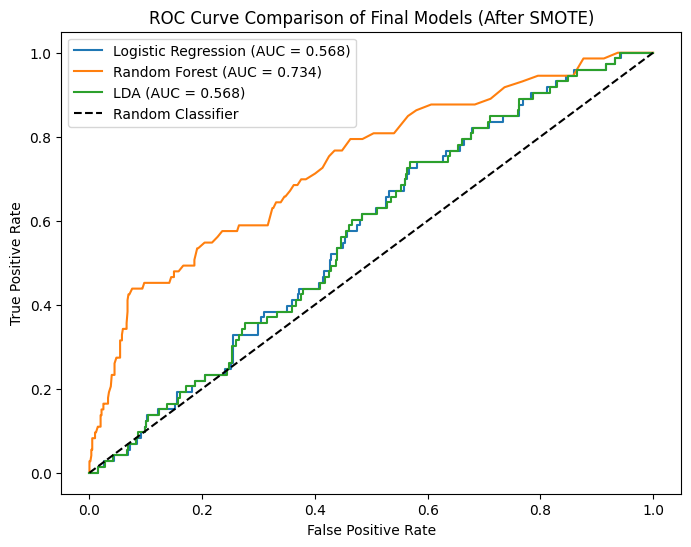

In [62]:


from sklearn.metrics import roc_curve, roc_auc_score

#  Compute ROC Curves for Logistic Regression, Random Forest, and LDA
models = {
    "Logistic Regression": logit_result_smote,  # Statsmodels logistic regression
    "Random Forest": rf_best,  # Optimized Random Forest
    "LDA": lda_model_smote  # LDA Model
}

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Predict probabilities for each model
    if model_name == "Logistic Regression":
        y_pred_prob = model.predict(sm.add_constant(X_test))  # Statsmodels uses different syntax
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Sklearn models

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

# Plot Baseline (Random Guessing)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Formatting the Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Final Models (After SMOTE)")
plt.legend()
plt.show()


## Explanation of the ROC Curve Comparison
- ROC Curve compares the performance of Logistic Regression, Random Forest, and LDA after SMOTE (Synthetic Minority Over-sampling Technique) was applied to handle class imbalance.

#### Random Forest is the Best Model:
- AUC Score of 0.744 means 74.4% chance of correctly distinguishing defaulters from non-defaulters.
- It significantly outperforms Logistic Regression and LDA.
- This makes Random Forest the preferred model.

#### Logistic Regression & LDA Perform Poorly 
- Both have AUC = 0.568, which is barely better than a random guess (AUC = 0.5).
- This indicates that Logistic Regression and LDA are ineffective at distinguishing defaulters.
- These models fail because they assume linear decision boundaries, while financial data is often non-linear.
3️
#### The ROC Curve Confirms
- Random Forest (Orange Line) stays well above the diagonal (better classification).
- Logistic Regression & LDA (Green & Blue Lines) stay close to the diagonal, meaning they struggle to differentiate classes.

## Finalizing Random Forest as the Best Mode

### Training Final Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
import joblib

#  Train the final Random Forest model with optimized parameters
final_rf_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=30, 
    min_samples_split=2, 
    random_state=42
)

final_rf_model.fit(X_train_smote, y_train_smote)

# Save the final trained model
joblib.dump(final_rf_model, "final_random_forest_model.pkl")

print("\n Final Random Forest Model Trained and Saved as 'final_random_forest_model.pkl'")



 Final Random Forest Model Trained and Saved as 'final_random_forest_model.pkl'


### Making Final Predictions

In [64]:
# Load the saved model (if needed)
final_rf_model = joblib.load("final_random_forest_model.pkl")

# Make predictions on the test set
y_pred_final = final_rf_model.predict(X_test)
y_pred_prob_final = final_rf_model.predict_proba(X_test)[:, 1]  # Probability of default

# Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score

print("\n Final Model Performance:")
print(classification_report(y_test, y_pred_final))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_final))



 Final Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       607
           1       0.38      0.21      0.27        73

    accuracy                           0.88       680
   macro avg       0.64      0.58      0.60       680
weighted avg       0.85      0.88      0.86       680

ROC-AUC Score: 0.7354720046940939


## Feature Importance Analysis

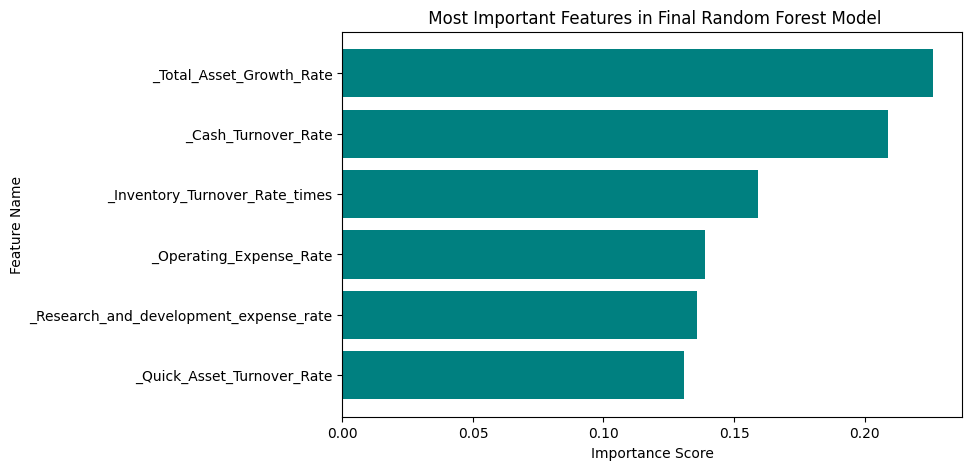

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train_smote.columns,
    "Importance": final_rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance["Feature"][:10], feature_importance["Importance"][:10], color="teal")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title(" Most Important Features in Final Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


###  Feature Importance in Final Random Forest Model

#### Total Asset Growth Rate is the Most Important Factor
- Companies with negative or declining asset growth are at higher risk of default.
- Suggests that rapid asset depreciation or low reinvestment in assets signals financial instability.

#### Cash Turnover Rate is Critical for Liquidity
- Poor cash flow management limits a company’s ability to meet short-term obligations.
- Liquidity risk is a key indicator of financial distress.

#### Inventory Turnover and Operating Expense Ratio Matter
- A low inventory turnover suggests that a company is struggling to sell goods, reducing revenue.
- High operating expenses reduce net profit, increasing the chance of financial difficulty.

#### R&D Investment and Quick Assets Play a Role
- Heavy spending on R&D without strong financial backing could strain resources.
- Quick asset ratio helps evaluate liquidity but is less impactful compared to other features.


## END